In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21048 sha256=35de97453fd02f113e10f70712676694cfd37ea977e31aacaa20085a87a74f5c
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


/usr/local/lib/python3.10/dist-packages/mplcursors/_pick_info.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  paths = scatter.__wrapped__(*args, **kwargs)


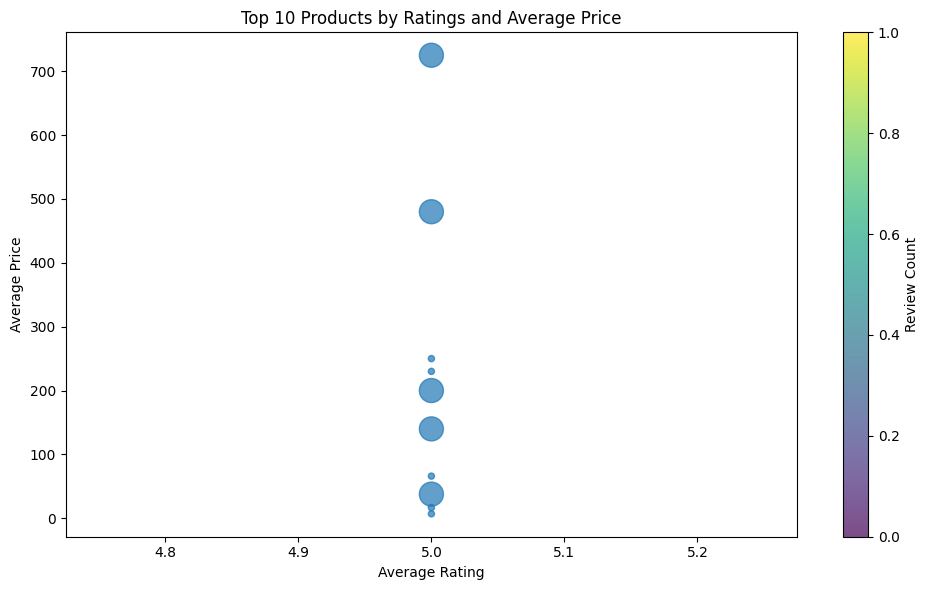

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors  # Import the library

# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/amazon_processed_output.csv")

# Convert 'Price' column to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert 'Rating' column to numeric, ignoring errors
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Filter out non-numeric and invalid ratings
valid_ratings = [1, 2, 3, 4, 5]
high_rated_df = df[df['Rating'].isin(valid_ratings)]

# Filter for price range between 15000 and 40000
price_range_df = high_rated_df[(high_rated_df['Price'] >= 1)]

# Group by product and calculate average price, rating, and count of reviews
grouped_df = price_range_df.groupby('Product Name').agg({'Price': 'mean', 'Rating': ['mean', 'count']}).reset_index()
grouped_df.columns = ['ProductName', 'AvgPrice', 'AvgRating', 'ReviewCount']

# Sort by rating and get the top 10 products
top_products = grouped_df.sort_values(by='AvgRating', ascending=False).head(10)

# Create the bubble chart using matplotlib
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    top_products['AvgRating'],
    top_products['AvgPrice'],
    s=top_products['ReviewCount'],
    alpha=0.7,
    cmap='viridis',
    sizes=(20, 300),
    label=top_products['ProductName']
)




plt.xlabel('Average Rating')
plt.ylabel('Average Price')
plt.title('Top 10 Products by Ratings and Average Price')

# Adding a color bar to show the size scale
color_bar = plt.colorbar(scatter)
color_bar.set_label('Review Count')

# Use mplcursors to show product names on click
cursor = mplcursors.cursor(hover=False)

# Annotate each bubble with the product name on click
# Annotate each bubble with the product name on click
@cursor.connect("add")
def on_click(sel):
    artist = sel.artist
    product_name = artist.get_label()
    sel.annotation.set_text(product_name)
    sel.annotation.get_bbox_patch().set(fc="white")

plt.tight_layout()
plt.show()